In [1]:
%env CUDA_VISIBLE_DEVICES=0
%env XLA_PYTHON_CLIENT_PREALLOCATE=false
%env JAX_ENABLE_X64=True

from datasets import PointDataset
from models import MLPCNF, Trainer

env: CUDA_VISIBLE_DEVICES=0
env: XLA_PYTHON_CLIENT_PREALLOCATE=false
env: JAX_ENABLE_X64=True


In [2]:
from flax import nnx
rngs = nnx.Rngs(0)

dataset = PointDataset(dim=3, rngs=rngs)
model = MLPCNF(x_dim=3, y_dim=3, rngs=rngs)
trainer = Trainer(dataset, model, batch_size=1024, epochs=10, rngs=rngs)
trainer.fit()

100%|██████████| 10/10 [00:15<00:00,  1.58s/it, loss=0.06795090639981174]


In [ ]:
import jax
import jax.random as jr

@jax.jit
@jax.vmap
def get_batches(rng):
    return jax.vmap(dataset.get_train_sample)(
        jr.split(rng, 1024)
    )
k = jr.split(rngs(), 1024)

x = get_batches(k)
nnx.display(x)
%timeit get_batches(k)[0].block_until_ready()

@jax.jit
@jax.vmap
def loss(batch):
    t, xt,dx, y = batch
    return (dx-jax.vmap(model)(t, xt,y))**2  
    
model

8.9 ms ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


  0%|          | 0/10 [00:00<?, ?it/s]

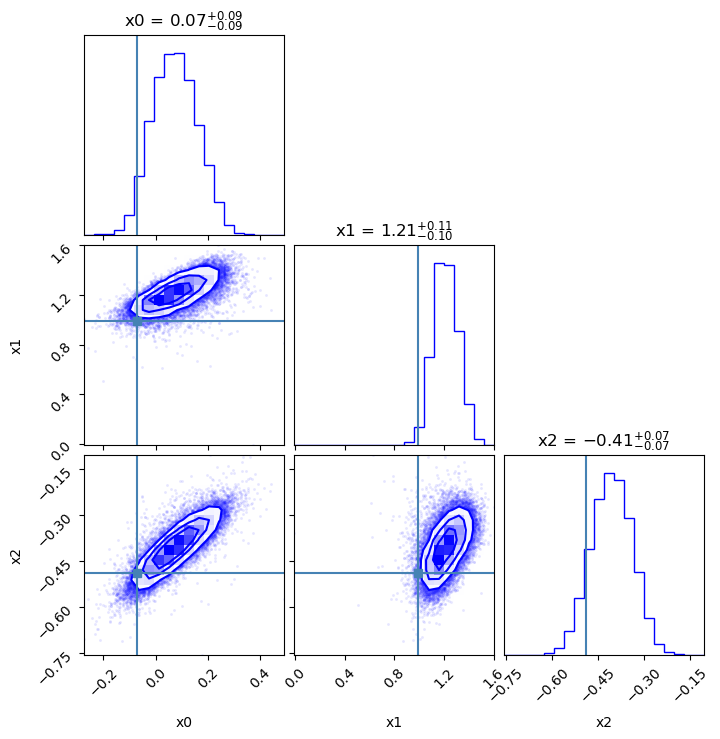

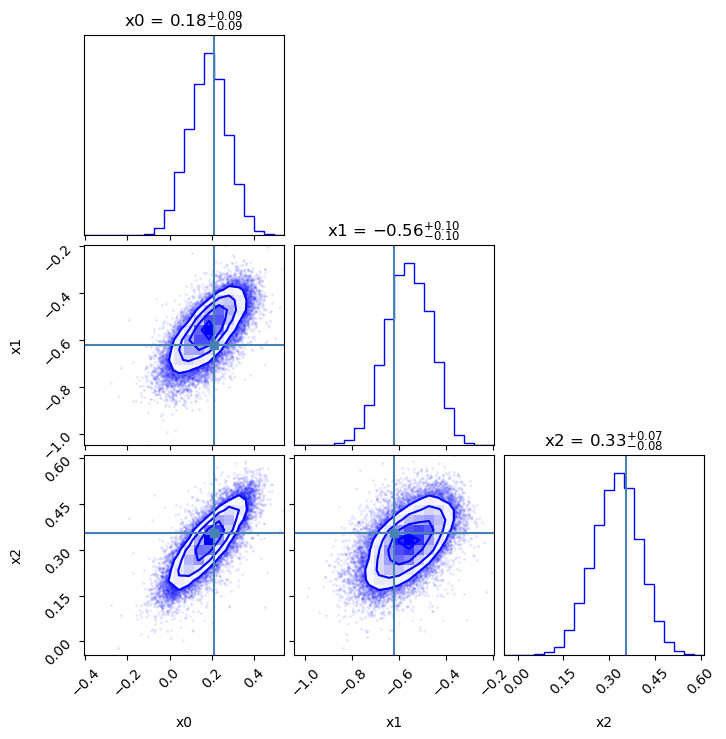

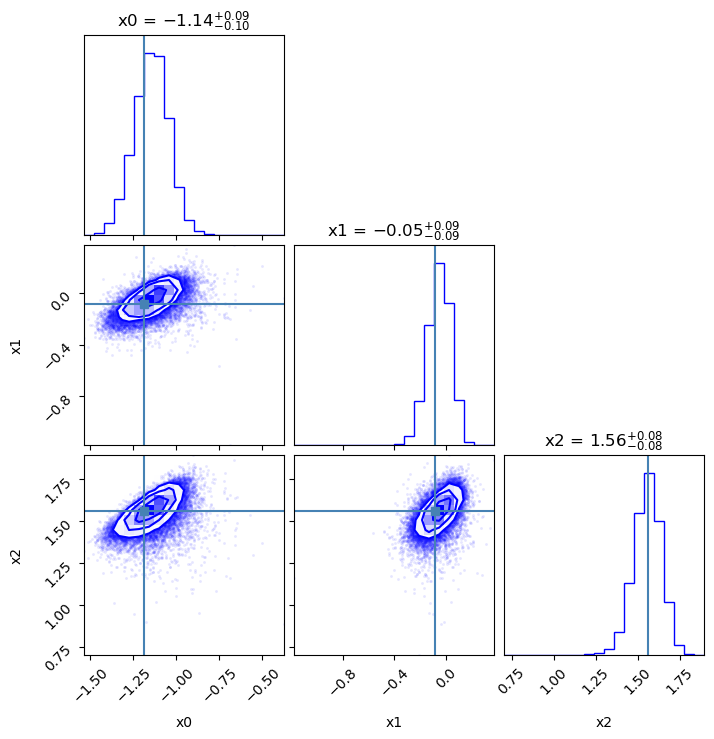

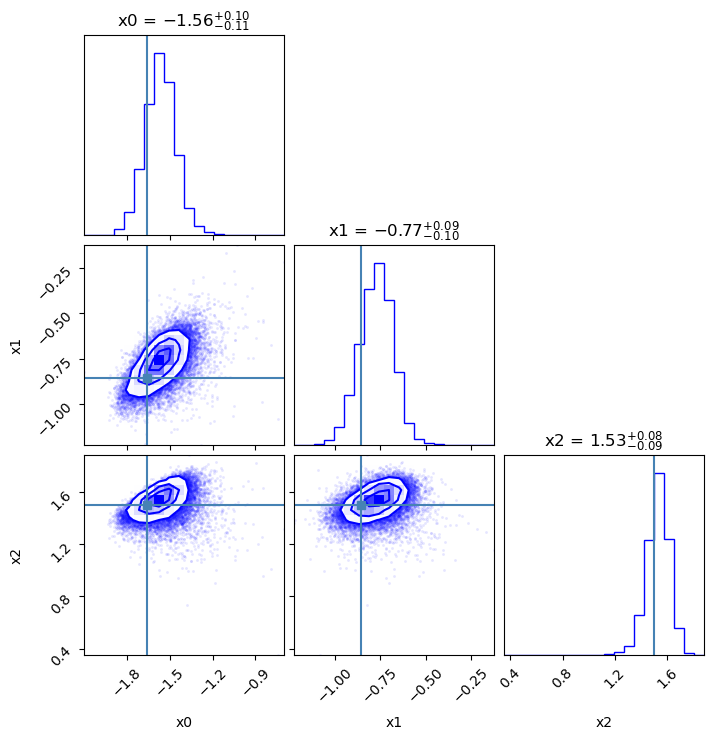

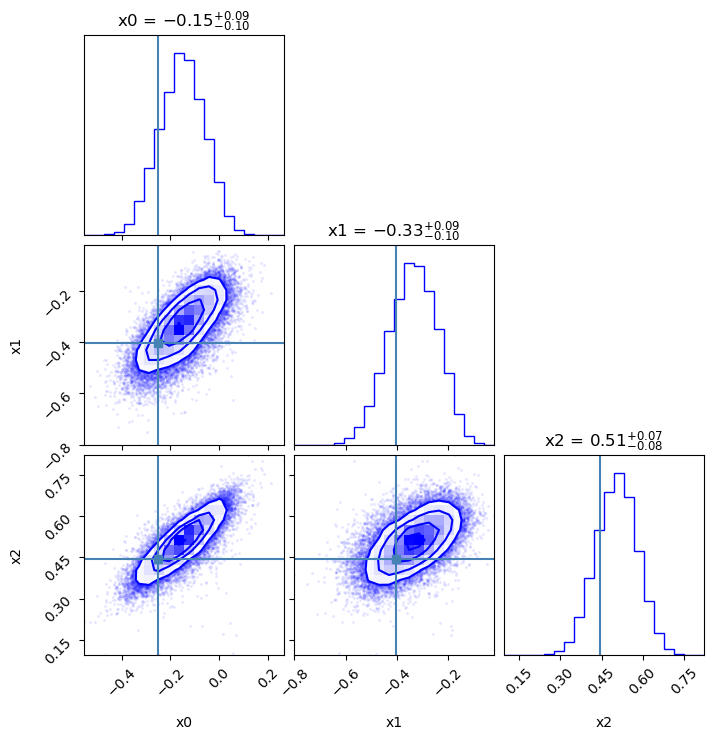

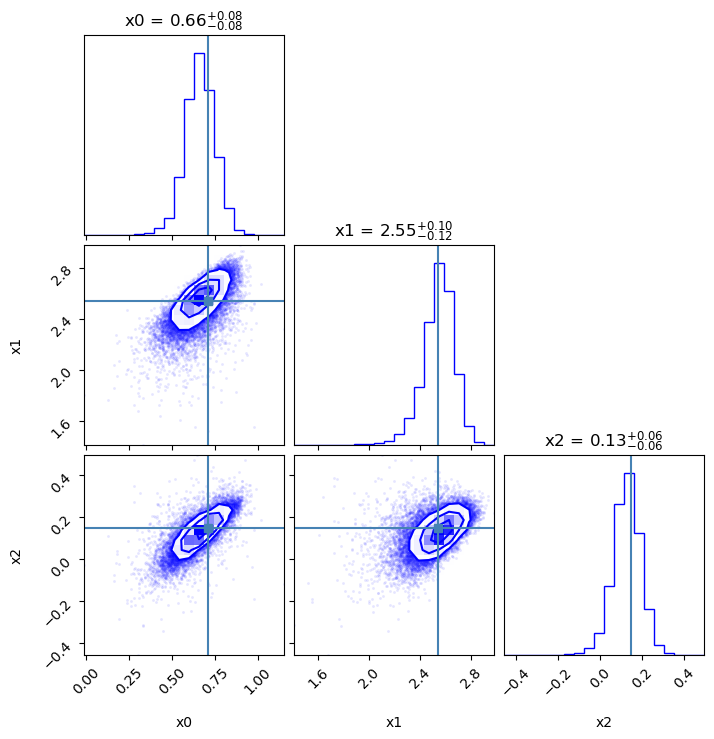

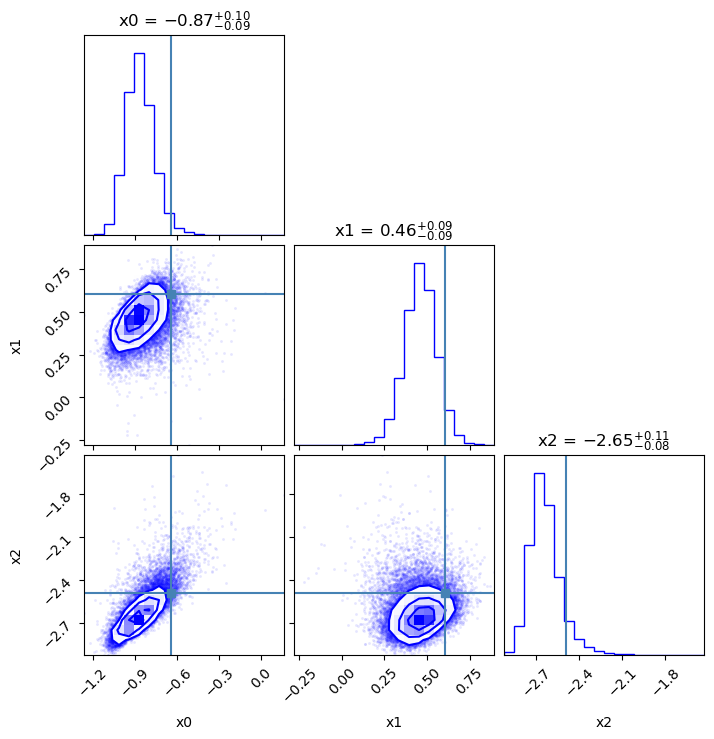

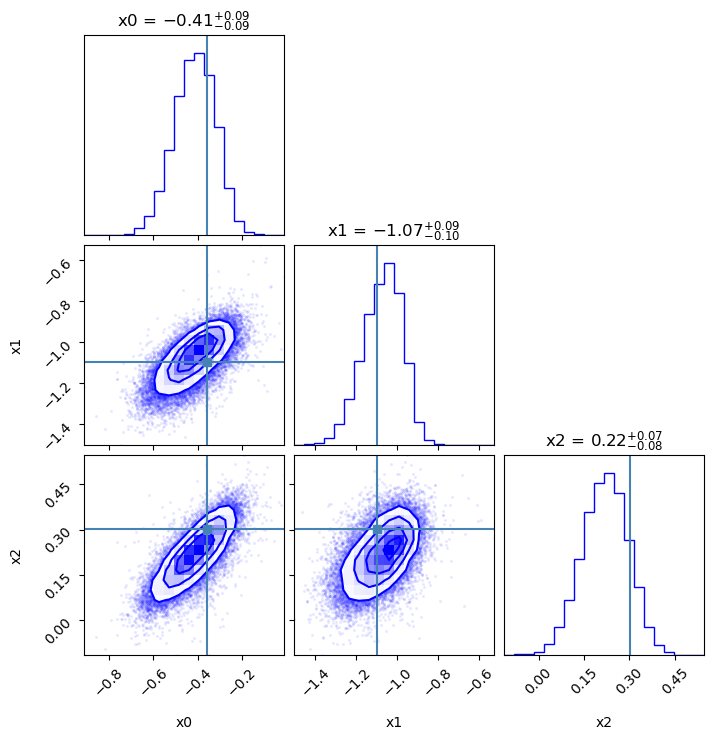

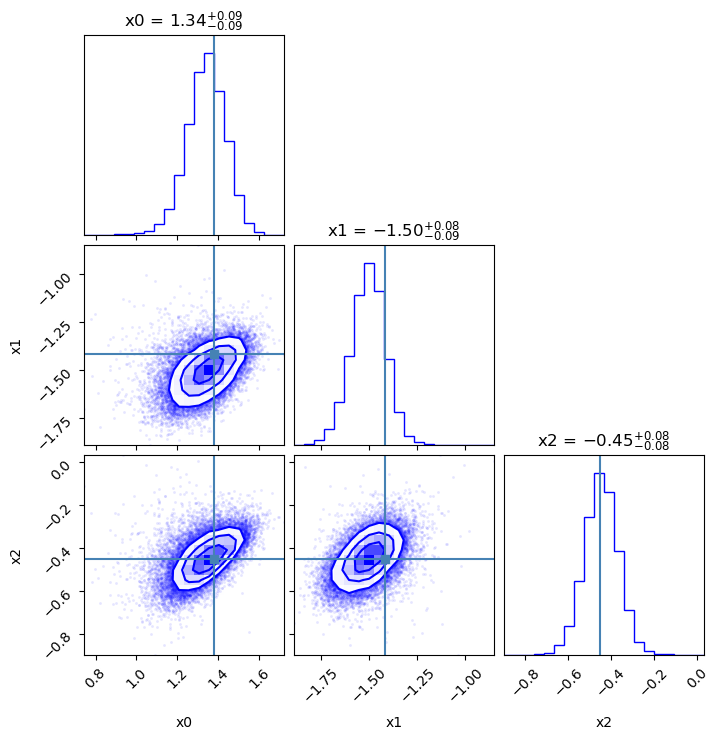

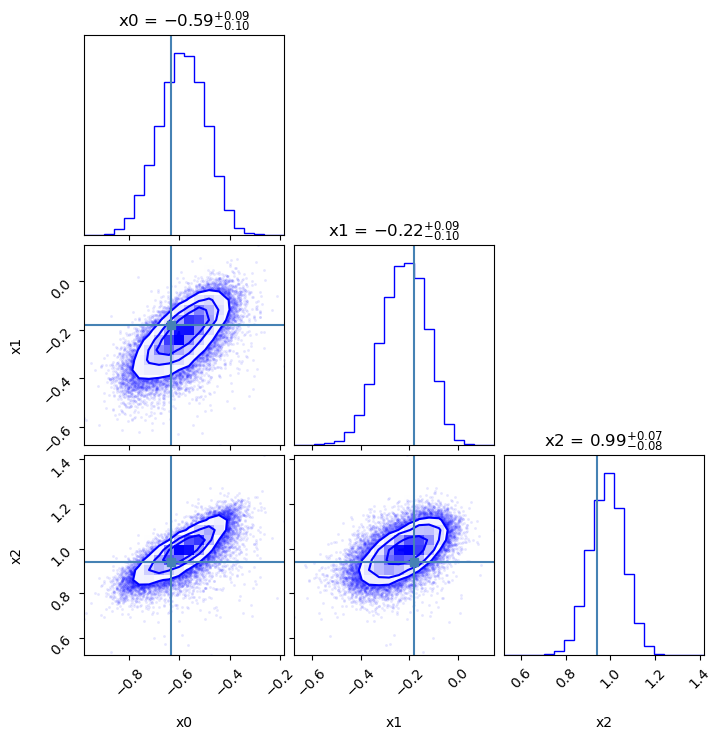

In [3]:
from utils import corner_plot
corner_plot(dataset, model, examples=10, samples=32*1024, verbose=True)